<a href="https://colab.research.google.com/github/Paulovinicius212/python_autoeletrica/blob/main/projeto_auto_eletrica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Alfa***

# **Importação de Bibliotecas**

In [13]:
import pandas as pd
import sqlite3
import tkinter as tk
from tkinter import messagebox


# **Configuração do Banco de Dados**

In [14]:
def initialize_database():
    conn = sqlite3.connect('/content/estoque.db')
    cursor = conn.cursor()
    cursor.execute('''CREATE TABLE IF NOT EXISTS produtos
                      (id INTEGER PRIMARY KEY, nome TEXT, quantidade INTEGER)''')
    conn.commit()
    conn.close()

initialize_database()


# **Desenvolvimento da Interface**

In [15]:
from google.colab import widgets
import ipywidgets as widgets

def show_widget():
    button = widgets.Button(description="Clique Aqui")
    def on_button_clicked(b):
        print("Botão clicado!")
    button.on_click(on_button_clicked)
    display(button)

show_widget()


Button(description='Clique Aqui', style=ButtonStyle())

# **Funções Utilitárias**

In [16]:
def add_product(name, quantity):
    conn = sqlite3.connect('/content/estoque.db')
    cursor = conn.cursor()
    cursor.execute('INSERT INTO produtos (nome, quantidade) VALUES (?, ?)', (name, quantity))
    conn.commit()
    conn.close()


# **Execução e Testes**

In [17]:
add_product('Produto A', 10)
print("Serviço adicionado com sucesso!")

Serviço adicionado com sucesso!


# **Interfaces**

In [18]:
import ipywidgets as widgets
from IPython.display import display

# Criar um botão
button = widgets.Button(description="Clique Aqui")

# Função a ser chamada quando o botão é clicado
def on_button_clicked(b):
    print("Botão clicado!")

# Associar a função ao evento de clique do botão
button.on_click(on_button_clicked)

# Exibir o botão no notebook
display(button)


Button(description='Clique Aqui', style=ButtonStyle())

In [19]:
from google.colab import widgets
import ipywidgets as widgets

# Criar um widget interativo simples
def handle_change(change):
    print("Novo valor:", change.new)

text = widgets.Text(value='Serviço adicionado!', description='Texto:')
text.observe(handle_change, names='value')
display(text)


Text(value='Serviço adicionado!', description='Texto:')

In [20]:
import plotly.graph_objects as go

# Criar um gráfico de dispersão simples
fig = go.Figure(data=go.Scatter(x=[1, 2, 3], y=[4, 5, 6], mode='markers'))
fig.show()


# **insights**

# ***Importar o CSV para o Google Colab***

In [21]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

# ***Carregar e Preparar os Dados***

In [22]:
import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv('Dados_autoeletrica - Página1.csv')

# Exibir as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
df.head()


,ID Produto,Nome do Produto,Quantidade em Estoque,Data de Entrada,Nome do Cliente,Serviço Realizado,Data do Serviço,Custo do Serviço
0,1,Bateria 12V,15,15/01/2024,João Silva,Troca de Bateria,20/01/2024,150.0
1,2,Alternador,8,05/02/2024,Maria Oliveira,Reparo Alternador,10/02/2024,200.0
2,3,Filtro de Óleo,30,01/03/2024,Pedro Santos,Troca de Filtro,05/03/2024,50.0
3,4,Velas de Ignição,20,10/04/2024,Ana Costa,Troca de Velas,15/04/2024,80.0
4,5,Radiador,5,15/05/2024,Carlos Lima,Substituição,20/05/2024,250.0


# ***Análise de Desempenho de Produtos***

In [23]:
produto_mais_estoque = df.loc[df['Quantidade em Estoque'].idxmax()]
print(f"Produto com maior quantidade em estoque: {produto_mais_estoque}")


Produto com maior quantidade em estoque: ID Produto                             3
Nome do Produto           Filtro de Óleo
Quantidade em Estoque                 30
Data de Entrada               01/03/2024
Nome do Cliente             Pedro Santos
Serviço Realizado        Troca de Filtro
Data do Serviço               05/03/2024
Custo do Serviço                    50.0
Name: 2, dtype: object


# ***Produto com Maior Custo de Serviço:***

In [24]:
produto_maior_custo = df.loc[df['Custo do Serviço'].idxmax()]
print(f"Produto com maior custo de serviço: {produto_maior_custo}")


Produto com maior custo de serviço: ID Produto                               47
Nome do Produto                   Embreagem
Quantidade em Estoque                     9
Data de Entrada                  01/12/2024
Nome do Cliente             Juliana Almeida
Serviço Realizado        Troca de Embreagem
Data do Serviço                  07/12/2024
Custo do Serviço                      330.0
Name: 46, dtype: object


# ***Total de Custo por Serviço:***

In [25]:
total_custo_servico = df.groupby('Serviço Realizado')['Custo do Serviço'].sum()
print("Total de custo por serviço:")
print(total_custo_servico)


Total de custo por serviço:
Serviço Realizado
Reparo Alternador                  200.0
Reparo Farol                       120.0
Reparo de Amortecedores            300.0
Reparo de Comando de Farol         130.0
Reparo de Farol                    125.0
Reparo de Sensor ABS               200.0
Reparo de Válvula                  190.0
Reparo de Válvula EGR              310.0
Reparo de Válvula de Pressão       195.0
Substituição                       250.0
Substituição de Amortecedor        200.0
Substituição de Amortecedores      310.0
Substituição de Bomba              220.0
Substituição de Cinta              140.0
Substituição de Correia            480.0
Substituição de Filtro              80.0
Substituição de Luzes              205.0
Substituição de Luzes de Freio      90.0
Substituição de Radiador          1085.0
Troca de Bateria                   400.0
Troca de Bujão                     190.0
Troca de Discos                    180.0
Troca de Embreagem                 650.0
Troca de Fi

# ***Serviço com Maior Frequência:***

In [26]:
servico_frequente = df['Serviço Realizado'].mode()[0]
print(f"Serviço mais frequente: {servico_frequente}")


Serviço mais frequente: Troca de Filtro


# ***Cliente que Gastou Mais:***

In [27]:
cliente_gasto = df.groupby('Nome do Cliente')['Custo do Serviço'].sum().idxmax()
print(f"Cliente que gastou mais: {cliente_gasto}")


Cliente que gastou mais: Juliana Almeida


# ***Número Total de Clientes Únicos:***

In [8]:
num_clientes_unicos = df['Nome do Cliente'].nunique()
print(f"Número total de clientes únicos: {num_clientes_unicos}")


Número total de clientes únicos: 49


# **Análise de Tendências Temporais**

# ***Custo Total por Mês:***

In [28]:
df['Data do Serviço'] = pd.to_datetime(df['Data do Serviço'])
df['Mês-Ano'] = df['Data do Serviço'].dt.to_period('M')
custo_total_mes = df.groupby('Mês-Ano')['Custo do Serviço'].sum()

print("Custo total por mês:")
print(custo_total_mes)


Custo total por mês:
Mês-Ano
2024-01    640.0
2024-02    715.0
2024-03    660.0
2024-04    515.0
2024-05    720.0
2024-06    520.0
2024-07    545.0
2024-08    530.0
2024-09    580.0
2024-10    685.0
2024-11    625.0
2024-12    700.0
Freq: M, Name: Custo do Serviço, dtype: float64


<ipython-input-28-f9866ff4d347>:1: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



# ***Quantidade Total de Serviços por Mês:***

In [29]:
quantidade_servicos_mes = df.groupby('Mês-Ano')['Nome do Cliente'].count()
print("Quantidade total de serviços por mês:")
print(quantidade_servicos_mes)


Quantidade total de serviços por mês:
Mês-Ano
2024-01    5
2024-02    5
2024-03    5
2024-04    4
2024-05    4
2024-06    4
2024-07    4
2024-08    4
2024-09    4
2024-10    4
2024-11    4
2024-12    3
Freq: M, Name: Nome do Cliente, dtype: int64


# **Visualizações**

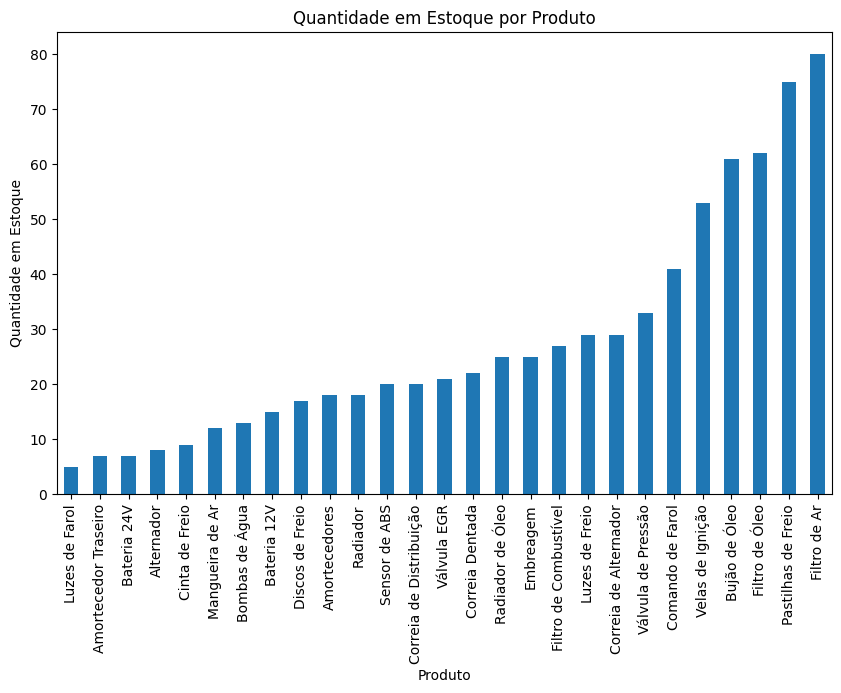

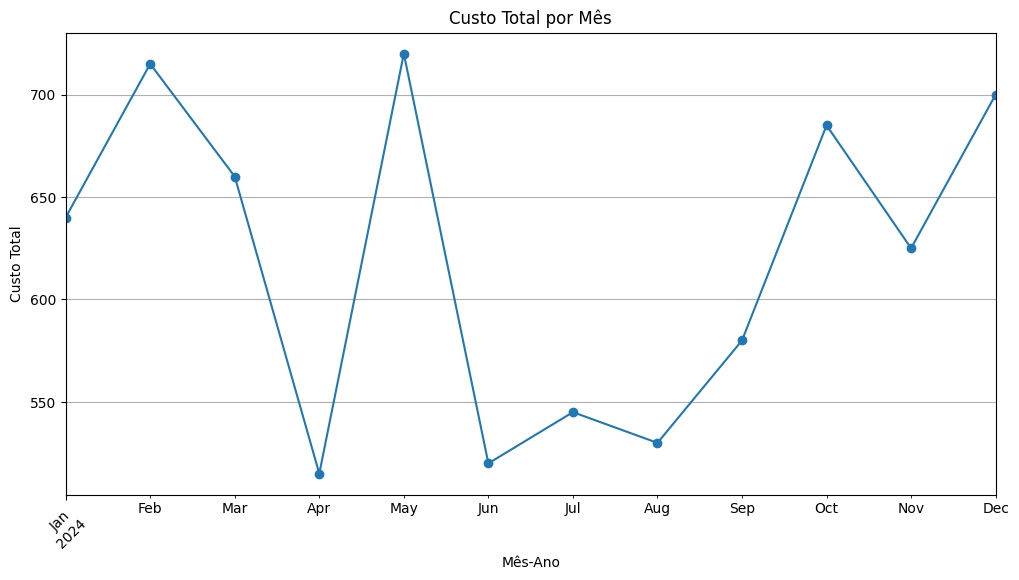

In [30]:
import matplotlib.pyplot as plt

# Gráfico de barras para produtos com maior quantidade em estoque
plt.figure(figsize=(10, 6))
df.groupby('Nome do Produto')['Quantidade em Estoque'].sum().sort_values().plot(kind='bar')
plt.title('Quantidade em Estoque por Produto')
plt.xlabel('Produto')
plt.ylabel('Quantidade em Estoque')
plt.show()

# Gráfico de linha para custo total por mês
plt.figure(figsize=(12, 6))
custo_total_mes.plot(kind='line', marker='o')
plt.title('Custo Total por Mês')
plt.xlabel('Mês-Ano')
plt.ylabel('Custo Total')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# ***Gráficos de Dispersão Interativos***

In [31]:
import plotly.express as px

# Exemplo de gráfico de dispersão interativo
fig = px.scatter(df, x='Quantidade em Estoque', y='Custo do Serviço',
                 color='Nome do Produto', title='Quantidade em Estoque vs Custo do Serviço')
fig.show()


/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# ***Gráficos de Barras Empilhadas***

In [32]:
import plotly.express as px

# Exemplo de gráfico de barras empilhadas
df['Data do Serviço'] = pd.to_datetime(df['Data do Serviço'])
df['Ano'] = df['Data do Serviço'].dt.year

fig = px.bar(df, x='Ano', y='Custo do Serviço', color='Nome do Produto',
             title='Custo dos Serviços por Ano', labels={'Ano': 'Ano', 'Custo do Serviço': 'Custo'})
fig.update_layout(barmode='stack')
fig.show()


/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# ***Mapas de Calor***

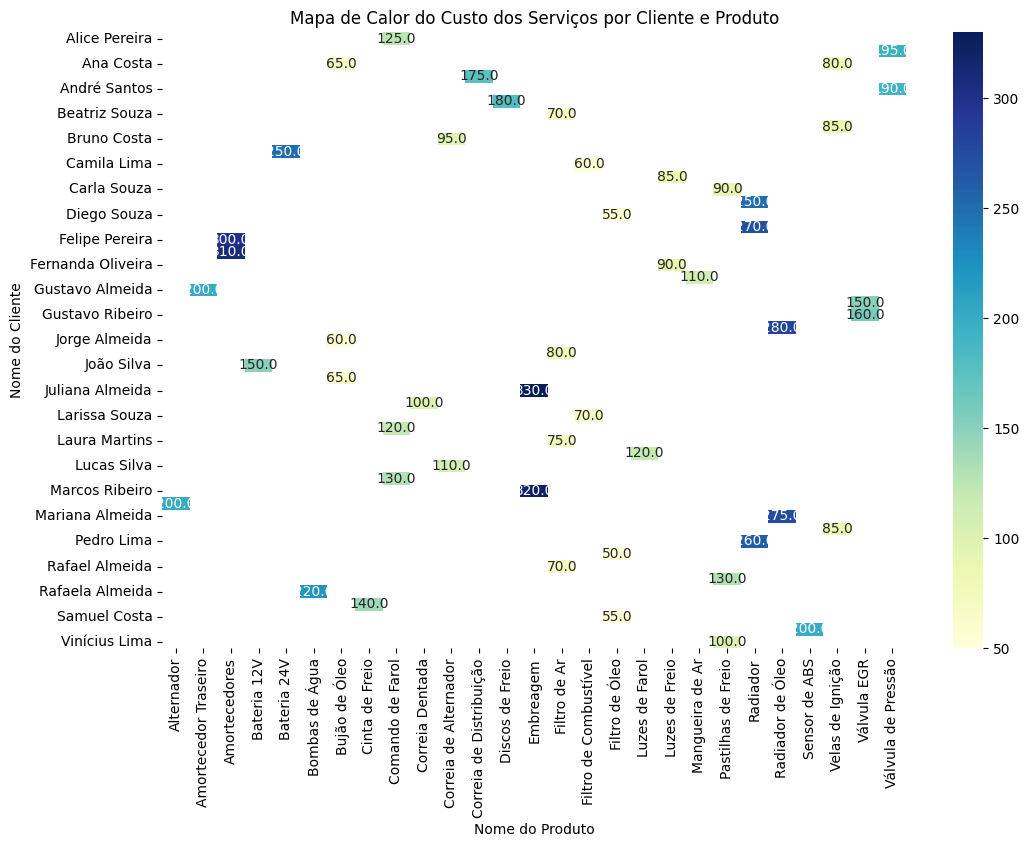

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivotar o DataFrame para criar uma matriz de calor
pivot_table = df.pivot_table(values='Custo do Serviço', index='Nome do Cliente', columns='Nome do Produto', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Mapa de Calor do Custo dos Serviços por Cliente e Produto')
plt.show()


# ***Gráficos de Caixa***

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



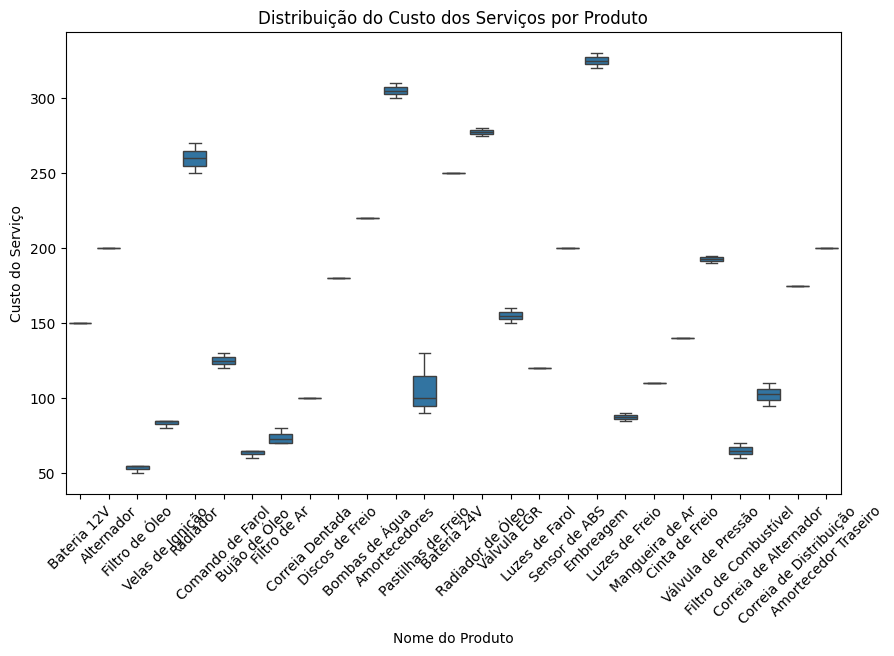

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo de gráfico de caixa
plt.figure(figsize=(10, 6))
sns.boxplot(x='Nome do Produto', y='Custo do Serviço', data=df)
plt.xticks(rotation=45)
plt.title('Distribuição do Custo dos Serviços por Produto')
plt.show()


# ***Gráficos de Séries Temporais com Anotações***

In [35]:
import plotly.graph_objects as go

# Exemplo de gráfico de séries temporais com anotações
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Data de Entrada'], y=df['Custo do Serviço'],
                         mode='lines+markers',
                         name='Custo do Serviço'))

fig.update_layout(title='Série Temporal do Custo dos Serviços',
                  xaxis_title='Data',
                  yaxis_title='Custo do Serviço',
                  shapes=[
                      dict(
                          type='line',
                          x0='2024-01-01', x1='2024-01-01',
                          y0=0, y1=df['Custo do Serviço'].max(),
                          line=dict(color='Red', width=2)
                      )
                  ])
fig.show()


# **Algoritmos de Previsão**

# ***Preparar o Ambiente***

In [36]:
!pip install prophet


In [37]:
!pip install -q condacolab
import condacolab
condacolab.install()


✨🍰✨ Everything looks OK!


In [38]:
!mamba install -c conda-forge prophet



Looking for: ['prophet']

conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache

Pinned packages:
  - python 3.10.*
  - python 3.10.*
  - python_abi 3.10.* *cp310*
  - cuda-version 12.*


Transaction

  Prefix: /usr/local

  All requested packages already installed



# ***Usar Alternativas de Séries Temporais***

<ipython-input-39-0b54ba7d29cf>:24: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



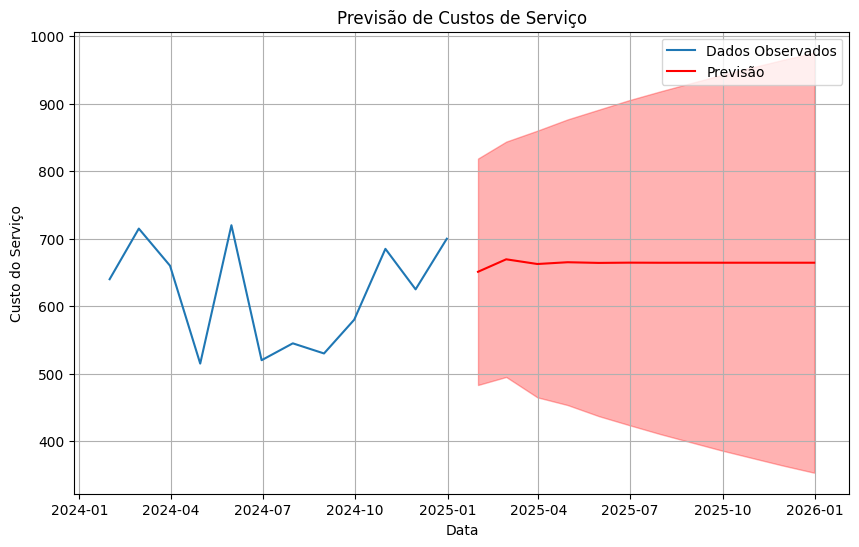

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregar os dados
df = pd.read_csv('/content/Dados_autoeletrica - Página1.csv')

# Converter a coluna 'Data do Serviço' para datetime, especificando o formato se necessário
df['Data do Serviço'] = pd.to_datetime(df['Data do Serviço'], format='%d/%m/%Y', dayfirst=True)

# Preparar os dados
df = df[['Data do Serviço', 'Custo do Serviço']]
df.set_index('Data do Serviço', inplace=True)

# Resample por mês e preencher valores ausentes
df_monthly = df.resample('ME').sum().fillna(0)  # Usar 'ME' para fim do mês

# Ajustar o modelo ARIMA
model = sm.tsa.ARIMA(df_monthly, order=(1, 1, 1))
results = model.fit()

# Fazer previsões
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=df_monthly.index[-1], periods=13, freq='M')[1:]
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(df_monthly, label='Dados Observados')
plt.plot(forecast_index, forecast_mean, label='Previsão', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.legend()
plt.title('Previsão de Custos de Serviço')
plt.xlabel('Data')
plt.ylabel('Custo do Serviço')
plt.grid(True)
plt.show()


# ***Modelos SARIMA***

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

<ipython-input-42-a64cecbd0c14>:24: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



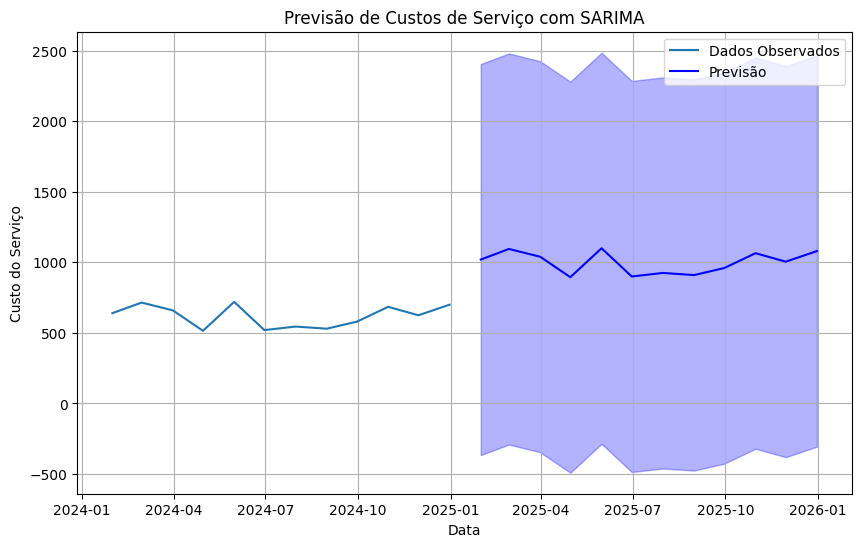

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carregar os dados
df = pd.read_csv('/content/Dados_autoeletrica - Página1.csv')

# Converter a coluna 'Data do Serviço' para datetime
df['Data do Serviço'] = pd.to_datetime(df['Data do Serviço'], format='%d/%m/%Y', dayfirst=True)

# Preparar os dados
df = df[['Data do Serviço', 'Custo do Serviço']]
df.set_index('Data do Serviço', inplace=True)

# Resample por mês e preencher valores ausentes
df_monthly = df.resample('ME').sum().fillna(0)

# Ajustar o modelo SARIMA
model = sm.tsa.SARIMAX(df_monthly, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Fazer previsões
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=df_monthly.index[-1], periods=13, freq='M')[1:]
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(df_monthly, label='Dados Observados')
plt.plot(forecast_index, forecast_mean, label='Previsão', color='blue')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='blue', alpha=0.3)
plt.legend()
plt.title('Previsão de Custos de Serviço com SARIMA')
plt.xlabel('Data')
plt.ylabel('Custo do Serviço')
plt.grid(True)
plt.show()


# ***Modelos de Regressão com Séries Temporais***

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

<ipython-input-44-77474b67ba6e>:26: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



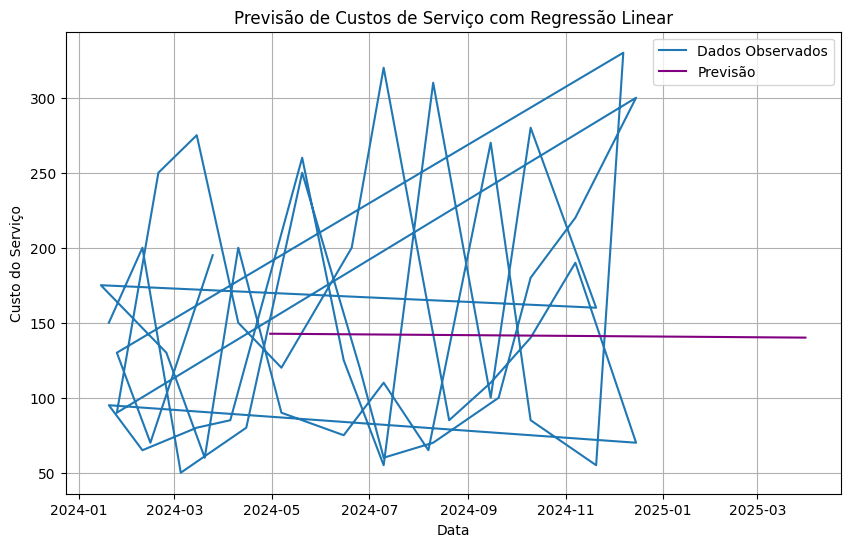

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Carregar os dados
df = pd.read_csv('/content/Dados_autoeletrica - Página1.csv')

# Converter a coluna 'Data do Serviço' para datetime
df['Data do Serviço'] = pd.to_datetime(df['Data do Serviço'], format='%d/%m/%Y', dayfirst=True)

# Preparar os dados
df = df[['Data do Serviço', 'Custo do Serviço']]
df.set_index('Data do Serviço', inplace=True)

# Criar uma coluna para a sequência de tempo
df['Time'] = np.arange(len(df))

# Ajustar o modelo de regressão
model = LinearRegression()
model.fit(df[['Time']], df['Custo do Serviço'])

# Fazer previsões
future_time = np.arange(len(df), len(df) + 12).reshape(-1, 1)
forecast = model.predict(future_time)
forecast_index = pd.date_range(start=df.index[-1], periods=13, freq='M')[1:]

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Custo do Serviço'], label='Dados Observados')
plt.plot(forecast_index, forecast, label='Previsão', color='purple')
plt.legend()
plt.title('Previsão de Custos de Serviço com Regressão Linear')
plt.xlabel('Data')
plt.ylabel('Custo do Serviço')
plt.grid(True)
plt.show()
